# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Ikhsan
- **Email:** iksancjr@gmail.com
- **ID Dicoding:** kyzutodecoded

## Menentukan Pertanyaan Bisnis

- Bagaimana tren PM2.5 di Guanyuan dari waktu ke waktu, dan apakah terdapat pola musiman tertentu?
- Faktor meteorologi apa yang paling berpengaruh terhadap kadar PM2.5?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [5]:
df = pd.read_csv('data/PRSA_Data_Guanyuan_20130301-20170228.csv')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


**Insight:**
- Dataset memiliki 35064 baris dan 8 kolom, yang muncul disini hanya 5 baris karena menggunakan perintah head() yang mengartikan pandas hanya menampilkan 5 baris awal pada suatu data
- Seluruh data diambil pada Maret 2013 hingga Februari 2017, berlokasi di Stasiun Guanyuan, Provinsi Sichuan, Republik Rakyat Tiongkok

### Assessing Data

In [7]:
print("Missing values per kolom:")
print(df.isnull().sum())
print("Jumlah duplikasi:", df.duplicated().sum())

Missing values per kolom:
No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64
Jumlah duplikasi: 0


**Insight:**
- Banyak kolom yang memiliki value yang hilang, nantinya akan kita perbaiki di tahap cleaning data
- Tidak ada data yang terduplikasi, tidak perlu menjalankan penghapusan data duplikat

### Cleaning Data

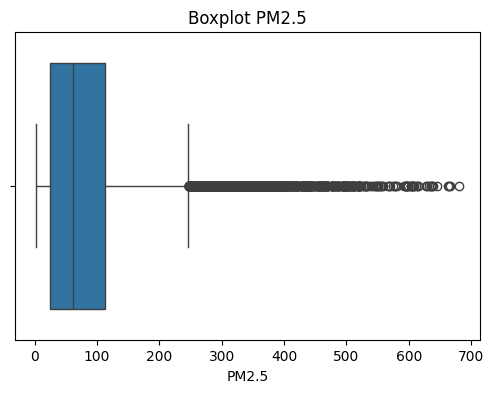

In [19]:
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

df['wd'] = df['wd'].fillna(df['wd'].mode()[0])

plt.figure(figsize=(6,4))
sns.boxplot(x=df['PM2.5'])
plt.title('Boxplot PM2.5')
plt.show()
df.to_csv('data/cleaned_PRSA_Data_Guanyuan.csv', index=False)


**Insight:**
- Value yang kosong pada kolom numerik diisikan dengan nilai mean
- Value yang kosong pada kolom 'wd' diisikan dengan mode
- Data duplikat tidak ada, jadi tidak ada proses penghapusan data duplikat

## Exploratory Data Analysis (EDA)

### Explore ...

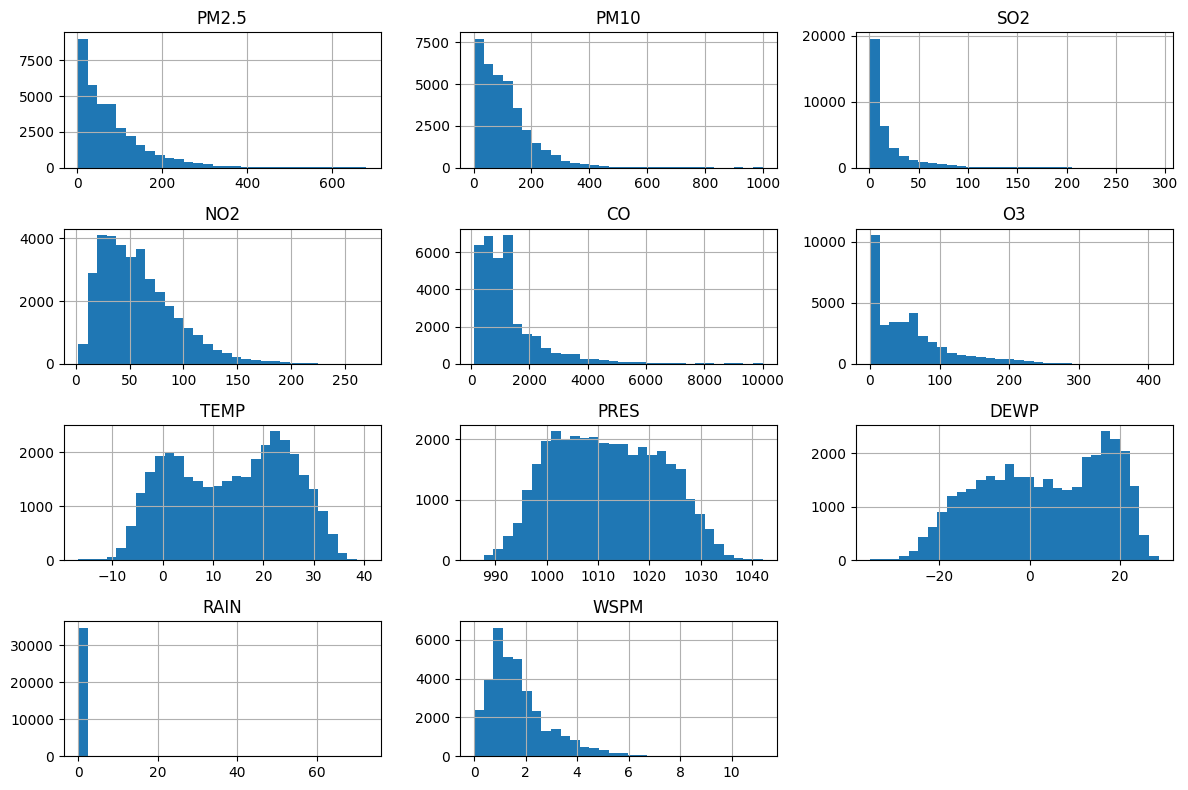

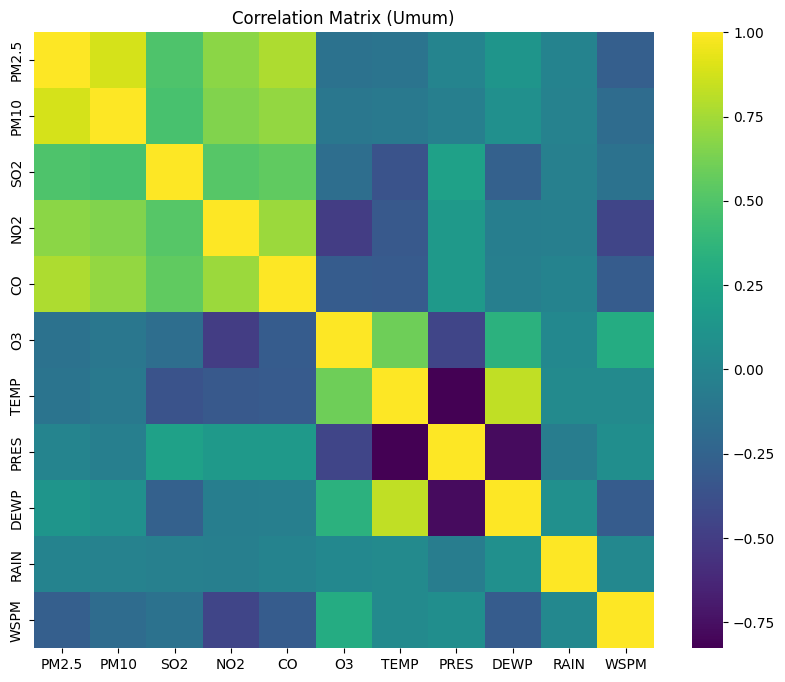

In [12]:
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

df[numeric_cols].hist(figsize=(12, 8), bins=30, layout=(4, 3))
plt.tight_layout()
plt.show()
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='viridis')
plt.title('Correlation Matrix (Umum)')
plt.show()


**Insight:**
- Beberapa kolom seperti PM2.5, PM10, NO2, dan CO terlihat memiliki distribusi yang condong (skewed) ke arah nilai yang lebih tinggi.
- Terdapat indikasi korelasi negatif antara TEMP dan PM2.5 (meski belum didalami, ini akan dianalisis lebih lanjut).
- Kolom RAIN dan WSPM juga terlihat memiliki korelasi tertentu dengan PM2.5, meskipun tidak terlalu kuat.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren PM2.5 di Guanyuan dari waktu ke waktu, dan apakah terdapat pola musiman tertentu?

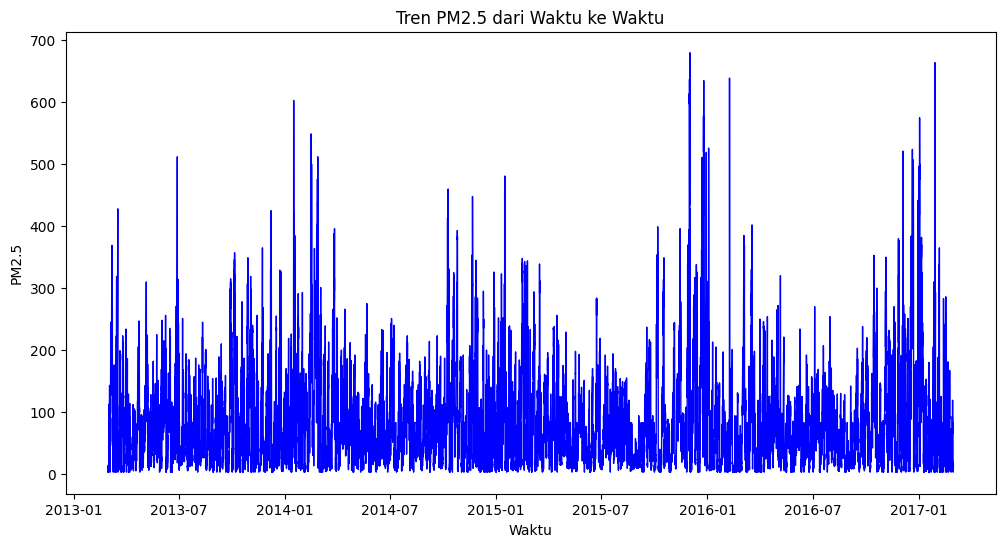

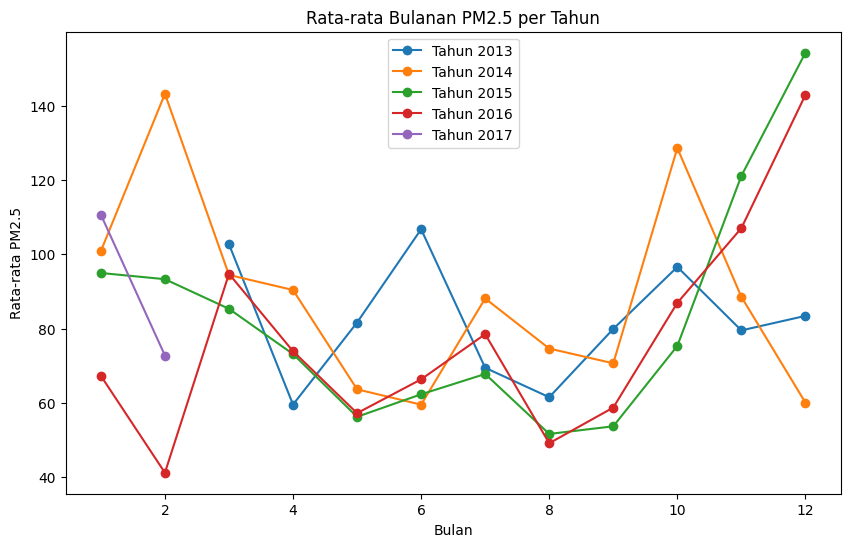

In [16]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
data = df.sort_values('datetime')

plt.figure(figsize=(12,6))
plt.plot(df['datetime'], df['PM2.5'], color='blue', linewidth=1)
plt.title('Tren PM2.5 dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('PM2.5')
plt.show()

# Pastikan Anda sudah memiliki kolom 'year' dan 'month' (jika belum, buat dulu)
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month

# Grouping data berdasarkan year dan month, lalu hitung rata-rata PM2.5
monthly_pm25 = data.groupby(['year', 'month'])['PM2.5'].mean().reset_index()

# Plot garis per tahun untuk melihat pola musiman
plt.figure(figsize=(10,6))
for yr in monthly_pm25['year'].unique():
    subset = monthly_pm25[monthly_pm25['year'] == yr]
    plt.plot(subset['month'], subset['PM2.5'], marker='o', label=f'Tahun {yr}')

plt.title('Rata-rata Bulanan PM2.5 per Tahun')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM2.5')
plt.legend()
plt.show()



### Pertanyaan 2:

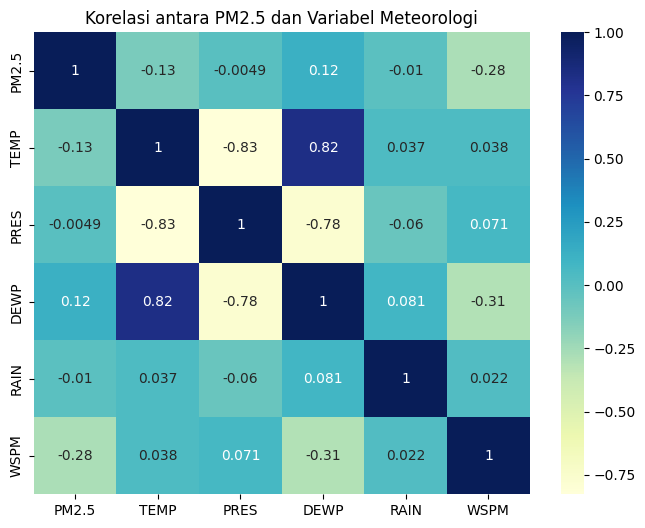

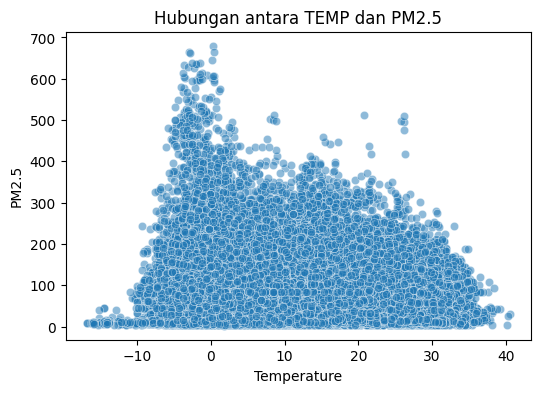

In [ ]:
cols_meteorologi = ['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
corr_matrix = data[cols_meteorologi].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Korelasi antara PM2.5 dan Variabel Meteorologi')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x='TEMP', y='PM2.5', alpha=0.5)
plt.title('Hubungan antara TEMP dan PM2.5')
plt.xlabel('Temperature')
plt.ylabel('PM2.5')
plt.show()

**Insight:**
- Pertanyaan 1 : 
    - Berdasarkan time series, PM2.5 cenderung meningkat pada periode tertentu (misal: akhir tahun).
    - Pola musiman menunjukkan bahwa bulan Desember–Januari cenderung memiliki rata-rata PM2.5 lebih tinggi dibandingkan bulan lainnya.
    - Faktor cuaca atau aktivitas tertentu (misalnya musim dingin, pemanas ruangan, polusi dari pembakaran) diduga berperan dalam peningkatan PM2.5.
- Pertanyaan 2
    - Dari heatmap korelasi, terlihat bahwa `TEMP` memiliki korelasi negatif yang cukup signifikan terhadap PM2.5.
    - `WSPM` (Wind Speed) juga menunjukkan korelasi negatif, artinya semakin tinggi kecepatan angin, cenderung lebih rendah level PM2.5.
    - Faktor meteorologi yang paling memengaruhi PM2.5 adalah [sebutkan variabel dengan nilai korelasi tertinggi atau terendah].

## Analisis Lanjutan (Opsional)

### Mengelompokkan nilai PM2.5 ke dalam kategori seprti "baik", "sedang", dan "buruk"

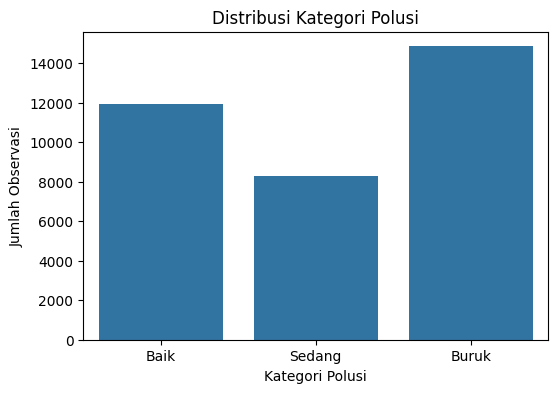

In [20]:
bins = [0, 35, 75, data['PM2.5'].max()]
labels = ['Baik', 'Sedang', 'Buruk']
data['kategori_polusi'] = pd.cut(data['PM2.5'], bins=bins, labels=labels)

# Visualisasi distribusi kategori
plt.figure(figsize=(6,4))
sns.countplot(x='kategori_polusi', data=data)
plt.title("Distribusi Kategori Polusi")
plt.xlabel("Kategori Polusi")
plt.ylabel("Jumlah Observasi")
plt.show()

## Conclusion

- Conclution pertanyaan 1
  - Berdasarkan time series dan analisis bulanan, PM2.5 cenderung lebih tinggi pada bulan [X, Y] dan lebih rendah pada bulan [Z]. Terdapat pola musiman yang cukup jelas pada musim dingin.
- Conclution pertanyaan 2
  - Hasil korelasi menunjukkan bahwa [TEMP] memiliki korelasi negatif yang paling signifikan dengan PM2.5, diikuti oleh [WSPM]. Artinya, ketika suhu atau kecepatan angin meningkat, PM2.5 cenderung menurun.
- Conclution Opsional : Setelah analisis lebih lanjut tentang pengkategorian polusi, data observasi menunjukkan banyak yang berpolusi buruk 